# groundup_003_matmul

In [ ]:
#| default_exp delete0002

## Matrix multiplication from foundations

The *foundations* we'll assume throughout this course are:

- Python
- matplotlib
- The Python standard library
- Jupyter notebooks and nbdev

## imports

In [ ]:
from fastdebug.utils import *
from fastdebug.core import *

In [ ]:
from fastdebug.groundup import *

In [ ]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

## get_exp_data

In [ ]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data

PosixPath('data')

In [ ]:
path_data.mkdir(exist_ok=True) # created a data folder in the current directory

In [ ]:
path_gz = path_data/'mnist.pkl.gz'
path_gz

PosixPath('data/mnist.pkl.gz')

[urlretrieve](https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve) - (read the docs!)

In [ ]:
from urllib.request import urlretrieve

In [ ]:
check(urlretrieve)

signature: (url, filename=None, reporthook=None, data=None)
__class__: <class 'function'>
__repr__: <function urlretrieve>

__doc__:
Retrieve a URL into a temporary location on disk.

Requires a URL argument. If a filename is passed, it is used as
the temporary file location. The reporthook argument should be
a callable that accepts a block number, a read size, and the
total file size of the URL target. The data argument should be
valid URL encoded data.

If a filename is passed and the URL points to a local resource,
the result is a copy from local file to new file.

__dict__: 
{}
metaclass: False
class: False
decorator: False
function: True
method: False


In [ ]:
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [ ]:
!ls -l data

total 33312
-rw-r--r--  1 Natsume  staff  17051982 Oct 11 18:46 mnist.pkl.gz


In [ ]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [ ]:
#| export
a = "todelete"

In [ ]:
#| export groundup
def get_exp_data():
    MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
    path_data = Path('data')
    path_data.mkdir(exist_ok=True) # created a data folder in the current directory
    path_gz = path_data/'mnist.pkl.gz'
    from urllib.request import urlretrieve
    if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)
    with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
    return x_train, y_train, x_valid, y_valid

In [ ]:
x_train, y_train, x_valid, y_valid = get_exp_data()

In [ ]:
x_train[0].shape
x_train[0].size
type(x_train[0])

(784,)

784

numpy.ndarray

### range, yield, chunks

In [ ]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [ ]:
#| export groundup
def chunks(x, sz):
    for i in range(0, len(x), sz): 
        print(i)
        yield x[i:i+sz]

In [ ]:
vals
list(chunks(vals, 5))

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

0
5


[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

In [ ]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

In [ ]:
type(chunks(lst1, 28))

generator

In [ ]:
img = list(chunks(lst1, 28))
len(img)

28

In [ ]:
check(plt.imshow)

signature: (X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
__class__: <class 'function'>
__repr__: <function imshow>

__doc__:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image set up the colormapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

The number of pixels used to render an image is set by the Axes size
and the *dpi* of the figure. This can lead to aliasing artifacts when
the image is resampled because the displayed image size will usually
not match the size of *X* (see
__dict__: 
{'__signature__': <Signature (X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation

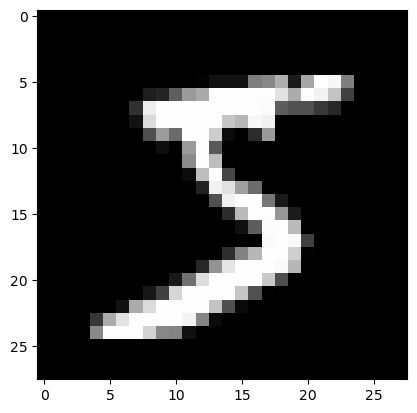

In [ ]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

### [islice](https://docs.python.org/3/library/itertools.html#itertools.islice)

In [ ]:
from itertools import islice

In [ ]:
islice.__class__

type

In [ ]:
help(islice)

Help on class islice in module itertools:

class islice(builtins.object)
 |  islice(iterable, stop) --> islice object
 |  islice(iterable, start, stop[, step]) --> islice object
 |  
 |  Return an iterator whose next() method returns selected values from an
 |  iterable.  If start is specified, will skip all preceding elements;
 |  otherwise, start defaults to zero.  Step defaults to one.  If
 |  specified as another value, step determines how many values are
 |  skipped between successive calls.  Works like a slice() on a list
 |  but returns an iterator.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  -------------------------------------------------------------

In [ ]:
vals
len(vals)

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

10

In [ ]:
it = iter(vals)
islice(it, 5)

<itertools.islice>

In [ ]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [ ]:
list(islice(it, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [ ]:
list(islice(it, 5))

[]

In [ ]:
check(iter)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in function iter>

__doc__:
iter(iterable) -> iterator
iter(callable, sentinel) -> iterator

Get an iterator from an object.  In the first form, the argument must
supply its own iterator, or be a sequence.
In the second form, the callable is called until it returns the sentinel.
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


### islice, iter, chunks_faster
why using `islice` and `iter` over `chunks`

In [ ]:
%timeit -n 10 it = iter(lst1)

54.2 ns ± 18.8 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit -n 10 img = list(iter(lambda: list(islice(it, 28)), []))

398 ns ± 104 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
len(img)

28

In [ ]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

In [ ]:
%timeit -n 10 img = list(chunks(lst1, 28))

6.32 µs ± 519 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
len(img)

28

In [ ]:
type(x_train[0])
x_train[0].shape
x_train[0].size

numpy.ndarray

(784,)

784

In [ ]:
#| export groundup
def chunks_faster(x, sz):
    "if the data is numpy.ndarray and shape is 1 dimension, then we use chunks to make it a pseudo 2d"
    lst = list(x)
    it = iter(lst)
    img = list(iter(lambda: list(islice(it, sz)), []))
    print(f'len: {len(img)}')
    return img

In [ ]:
img = chunks_faster(x_train[0], 28)

len: 28


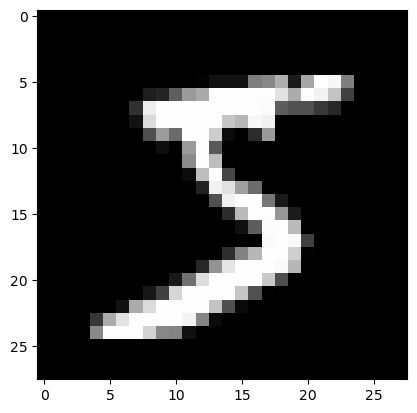

In [ ]:
plt.imshow(img);

## Matrix and tensor

### list and Matrix

In [ ]:
type(img)

list

In [ ]:
img[20][15]

0.98828125

In [ ]:
#| export groundup
class Matrix:
    "turning a list of list into a maxtrix like object"
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [ ]:
m = Matrix(img)
m[20,15]
type(m)

0.98828125

__main__.Matrix

### tensor, map, np.array

In [ ]:
import torch
from torch import tensor

In [ ]:
tensor([1,2,3])

tensor([1, 2, 3])

In [ ]:
type(x_train)
x_train.shape

numpy.ndarray

(50000, 784)

In [ ]:
check(tensor)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method tensor of type object>

__doc__:
tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor

Constructs a tensor with no autograd history (also known as a "leaf tensor", see :doc:`/notes/autograd`) by copying :attr:`data`.

.. warning::

    When working with tensors prefer using :func:`torch.Tensor.clone`,
    :func:`torch.Tensor.detach`, and :func:`torch.Tensor.requires_grad_` for
    readability. Letting `t` be a tensor, ``torch.tensor(t)`` is equivalent to
    ``t.clone().detach()``, and ``torch.tensor(t, requires_grad=True)``
    is equivalent to ``t.clone().detach().requires_grad_(True)``.
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
x_train.shape

torch.Size([50000, 784])

### tensor.type, tensor.reshape

In [ ]:
check(x_train.type)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method type of Tensor object>

__doc__:
type(dtype=None, non_blocking=False, **kwargs) -> str or Tensor
Returns the type if `dtype` is not provided, else casts this object to
the specified type.

If this is already of the correct type, no copy is performed and the
original object is returned.

Args:
    dtype (dtype or string): The desired type
    non_blocking (bool): If ``True``, and the source is in pinned memory
        and destination is on the GPU or vice versa, the copy is performed
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
x_train.type()

'torch.FloatTensor'

In [ ]:
check(x_train.reshape)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method reshape of Tensor object>

__doc__:
reshape(*shape) -> Tensor

Returns a tensor with the same data and number of elements as :attr:`self`
but with the specified shape. This method returns a view if :attr:`shape` is
compatible with the current shape. See :meth:`torch.Tensor.view` on when it is
possible to return a view.

See :func:`torch.reshape`

Args:
    shape (tuple of ints or int...): the desired shape
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
check(torch.reshape)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method reshape of type object>

__doc__:
reshape(input, shape) -> Tensor

Returns a tensor with the same data and number of elements as :attr:`input`,
but with the specified shape. When possible, the returned tensor will be a view
of :attr:`input`. Otherwise, it will be a copy. Contiguous inputs and inputs
with compatible strides can be reshaped without copying, but you should not
depend on the copying vs. viewing behavior.

See :meth:`torch.Tensor.view` on when it is possible to return a view.

A single dimension may be -1, in which case it's inferred from the remaining
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
%whos Tensor

Variable   Type      Data/Info
------------------------------
imgs       Tensor    tensor([[[0., 0., 0.,  ..<...> 0.,  ..., 0., 0., 0.]]])
x_train    Tensor    tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
x_valid    Tensor    tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
y_train    Tensor    tensor([5, 0, 4,  ..., 8, 4, 8])
y_valid    Tensor    tensor([3, 8, 6,  ..., 5, 6, 8])


In [ ]:
imgs = x_train.reshape((-1,28,28))

In [ ]:
imgs.shape

torch.Size([50000, 28, 28])

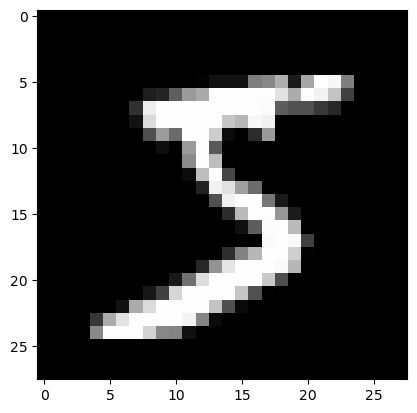

In [ ]:
plt.imshow(imgs[0]);

In [ ]:
imgs[0,20,15]

tensor(0.9883)

### torch.shape

In [ ]:
check(x_train.shape)

signature: None
__class__: <class 'torch.Size'>
__repr__: torch.Size([50000, 784])

__doc__: not exist

__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
check(torch.Size)

signature: (iterable=(), /)
__class__: <class 'type'>
__repr__: <class 'torch.Size'>

__doc__: not exist

__dict__: 
mappingproxy({'__add__': <slot wrapper '__add__' of 'torch.Size' objects>,
              '__doc__': None,
              '__getitem__': <slot wrapper '__getitem__' of 'torch.Size' objects>,
              '__mul__': <slot wrapper '__mul__' of 'torch.Size' objects>,
              '__new__': <built-in method __new__ of type object>,
              '__reduce__': <method '__reduce__' of 'torch.Size' objects>,
              '__repr__': <slot wrapper '__repr__' of 'torch.Size' objects>,
              '__rmul__': <slot wrapper '__rmul__' of 'torch.Size' objects>,
              'numel': <method 'numel' of 'torch.Size' objects>})
metaclass: False
class: True
decorator: False
function: False
method: False


In [ ]:
x_train.shape
n,c = x_train.shape
n,c

torch.Size([50000, 784])

(50000, 784)

In [ ]:
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [ ]:
min(y_train),max(y_train)

(tensor(0), tensor(9))

In [ ]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

## Random numbers

Based on the Wichmann Hill algorithm used before Python 2.3.

### divmod, seed, rand
Create your own random number between 0 and 1

In [ ]:
divmod(10, 3)

(3, 1)

In [ ]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [ ]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [ ]:
5%2
5%3

1

2

In [ ]:
#| export groundup
def rand():
    "create a random number between 0 and 1"
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [ ]:
rand(),rand(),rand()

(0.13455039420149784, 0.4721351139085965, 0.6692247098464666)

In [ ]:
check(os.fork)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in function fork>

__doc__:
Fork a child process.

Return 0 to child process and PID of child to parent process.
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
check(os._exit)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in function _exit>

__doc__:
Exit to the system with specified status, without normal exit processing.
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
check(os.EX_OK)

signature: None
__class__: <class 'int'>
__repr__: 0

__doc__:
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)

In parent: 0.38510065253433123
In child: 0.38510065253433123


In [ ]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.5786])
In child: tensor([0.5786])


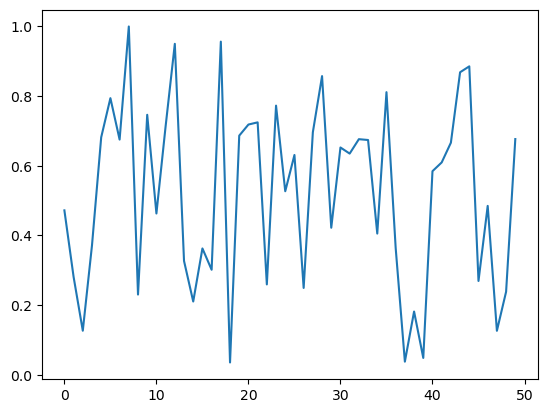

In [ ]:
plt.plot([rand() for _ in range(50)]);

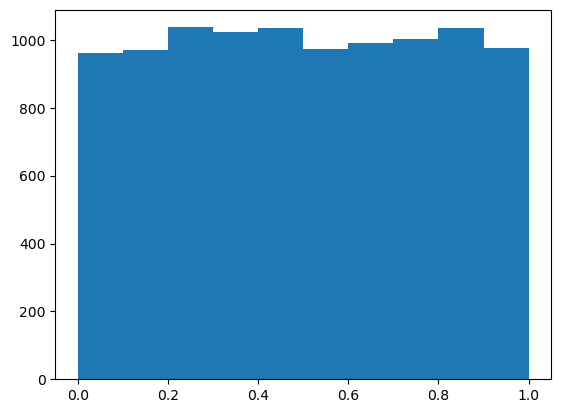

In [ ]:
plt.hist([rand() for _ in range(10000)]);

### torch.randn
much faster than rand from scratch

In [ ]:
check(torch.randn)

signature: None
__class__: <class 'builtin_function_or_method'>
__repr__: <built-in method randn of type object>

__doc__:
randn(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with random numbers from a normal distribution
with mean `0` and variance `1` (also called the standard normal
distribution).

.. math::
    \text{out}_{i} \sim \mathcal{N}(0, 1)

The shape of the tensor is defined by the variable argument :attr:`size`.

__dict__: not exist 

metaclass: False
class: False
decorator: False
function: False
method: False


In [ ]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

2.33 ms ± 420 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit -n 10 torch.randn(784,10)

136 µs ± 68.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
rd = torch.randn(784,10)
rd.shape
rd[:5].shape

torch.Size([784, 10])

torch.Size([5, 10])

## Matrix multiplication

In [ ]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [ ]:
weights[0,:]
len(weights[0,:])
bias
len(bias)

tensor([ 0.0485,  2.1788, -0.5677, -1.3342,  1.0235,  0.5989, -0.4625, -1.3744,
         0.3454,  0.7873])

10

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

10

In [ ]:
m1 = x_valid[:5] # as input
m2 = weights # as layer1 weights

In [ ]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
ar,ac = m1.shape # n_rows * n_cols
br,bc = m2.shape
(ar,ac),(br,bc)

((5, 784), (784, 10))

In [ ]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [ ]:
for i in range(ar):         # 5
    for j in range(bc):     # 10
        for k in range(ac): # 784
            t1[i,j] += m1[i,k] * m2[k,j]

In [ ]:
t1

tensor([[  0.9091, -17.0972,   6.2331,   3.4589,   3.4168,  -7.3515,  -4.5691,
          12.0965, -10.0381,   3.9120],
        [ -2.6617,  -5.1376,  12.1006,  -5.4475, -14.2431,   3.3890,   6.0283,
           7.7687,  10.6535,  -5.2815],
        [ -5.6225, -20.7328,   3.8879,   6.8072,  -3.4145,  11.0757,   3.2444,
           7.4377,  -8.0789,  -0.2106],
        [ -5.3815,  -6.0113,   3.2679,  13.8113,   7.3926,  -5.9792,   1.6270,
           6.1332,  -1.9247,  -2.4109],
        [ -5.9054,  -1.9708,  -7.3189,   6.3301,  13.7385,   3.0032, -11.1475,
          -6.3206, -10.7663,   7.1764]])

In [ ]:
t1.shape

torch.Size([5, 10])

### using np

In [ ]:
import numpy as np

In [ ]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
np.set_printoptions(precision=2, linewidth=140)
t1

tensor([[  0.91, -17.10,   6.23,   3.46,   3.42,  -7.35,  -4.57,  12.10, -10.04,   3.91],
        [ -2.66,  -5.14,  12.10,  -5.45, -14.24,   3.39,   6.03,   7.77,  10.65,  -5.28],
        [ -5.62, -20.73,   3.89,   6.81,  -3.41,  11.08,   3.24,   7.44,  -8.08,  -0.21],
        [ -5.38,  -6.01,   3.27,  13.81,   7.39,  -5.98,   1.63,   6.13,  -1.92,  -2.41],
        [ -5.91,  -1.97,  -7.32,   6.33,  13.74,   3.00, -11.15,  -6.32, -10.77,   7.18]])

In [ ]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): c[i,j] += a[i,k] * b[k,j]
    return c

In [ ]:
%time _=matmul(m1, m2)

CPU times: user 316 ms, sys: 1.09 ms, total: 317 ms
Wall time: 316 ms


In [ ]:
# |hide
import nbdev
nbdev.nbdev_export()